<a href="https://colab.research.google.com/github/saiananya1019/APIQueryBot/blob/main/Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
./cats_vs_dogs/train/dog/dog_18262.jpg
./cats_vs_dogs/train/dog/dog_18263.jpg
./cats_vs_dogs/train/cat/cat_18264.jpg
./cats_vs_dogs/train/dog/dog_18265.jpg
./cats_vs_dogs/train/dog/dog_18266.jpg
./cats_vs_dogs/train/cat/cat_18267.jpg
./cats_vs_dogs/train/cat/cat_18268.jpg
./cats_vs_dogs/train/cat/cat_18269.jpg
./cats_vs_dogs/train/dog/dog_18270.jpg
./cats_vs_dogs/train/cat/cat_18271.jpg
./cats_vs_dogs/train/dog/dog_18272.jpg
./cats_vs_dogs/train/dog/dog_18273.jpg
./cats_vs_dogs/train/cat/cat_18274.jpg
./cats_vs_dogs/train/dog/dog_18275.jpg
./cats_vs_dogs/train/cat/cat_18276.jpg
./cats_vs_dogs/train/dog/dog_18277.jpg
./cats_vs_dogs/train/dog/dog_18278.jpg
./cats_vs_dogs/train/dog/dog_18279.jpg
./cats_vs_dogs/train/cat/cat_18280.jpg
./cats_vs_dogs/train/cat/cat_18281.jpg
./cats_vs_dogs/train/dog/dog_18282.jpg
./cats_vs_dogs/train/dog/dog_18283.jpg
./cats_vs_dogs/train/dog/dog_18284.jpg
./cats_vs_dogs/train/dog/dog_18285.jpg
./cats_vs_dog

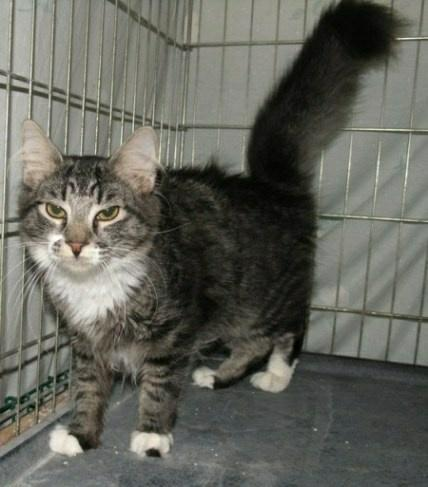

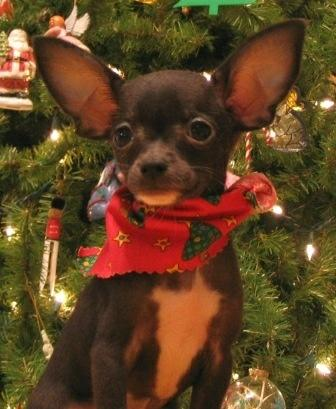

Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


In [2]:
# cat and dog classification using CNN
import tensorflow as tf
import tensorflow_datasets as tfds
import os, cv2


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

# loading the dataset
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)
class_names = info.features['label'].names



for i, example in enumerate(dataset['train']):
  image, label = example
  save_dir = './cats_vs_dogs/train/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok=True)

  filename = save_dir + '/' + "{}_{}.jpg".format(class_names[label], i)
  tf.keras.preprocessing.image.save_img(filename, image.numpy())
  print(filename)


import numpy as np
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/cats_vs_dogs/train/cat/cat_100.jpg")
cv2_imshow(img)

img1 = cv2.imread("/content/cats_vs_dogs/train/dog/dog_1.jpg")
cv2_imshow(img1)

datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2, rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.10, horizontal_flip=True)

print(datagen)

train_generator = datagen.flow_from_directory(
    '/content/cats_vs_dogs/train', target_size=(150, 150), batch_size=32, class_mode='binary', subset='training')


validation_generator = datagen.flow_from_directory(
    '/content/cats_vs_dogs/train', target_size=(150, 150), batch_size=32, class_mode='binary', subset='validation')

model = Sequential()

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Sequential

# Create a new Sequential model
model = Sequential()

# Add all layers at once
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# The problematic lines were removed from here
# model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(150,150,3)))
# model.add(MaxPooling2D(2))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# model.add(Conv2D(64,kernel_size=3,activation='relu'))
# model.add(MaxPooling2D(2))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))


# model.add(Conv2D(128,kernel_size=3,activation='relu'))
# model.add(MaxPooling2D(2))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dropout(0.5))
# model.add(Dense(512,activation='relu'))
# model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 74, 74, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 36, 36, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 17, 17, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,073 (72.61 MB)

 Trainable params: 19,034,625 (72.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [4]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=3, restore_best_weights=True)
history=model.fit(train_generator,epochs=10,validation_data=validation_generator,callbacks=[early_stop]) # Changed early_stopping to early_stop
history.history

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_generator,epochs=10,validation_data=validation_generator,callbacks=[early_stop])
history.history


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 167s 269ms/step - accuracy: 0.6163 - loss: 2.9821 - val_accuracy: 0.6794 - val_loss: 0.6013
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 147s 252ms/step - accuracy: 0.7138 - loss: 0.5647 - val_accuracy: 0.7532 - val_loss: 0.4989
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 146s 252ms/step - accuracy: 0.7424 - loss: 0.5215 - val_accuracy: 0.7620 - val_loss: 0.5070
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 159s 273ms/step - accuracy: 0.7628 - loss: 0.4874 - val_accuracy: 0.7650 - val_loss: 0.4886
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 145s 249ms/step - accuracy: 0.7814 - loss: 0.4642 - val_accuracy: 0.7661 - val_loss: 0.4959
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 147s 253ms/step - accuracy: 0.8024 - loss: 0.4348 - val_accuracy: 0.7777 - val_loss: 0.4756
Epoch 7/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 148s 255ms/step - accuracy: 0.8125 - loss: 0.4077 - val_accuracy: 0.7949 - val_loss: 0.4657
Epoch 8/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 147s 253ms/step - accuracy: 0.8193 -

{'accuracy': [0.843909502029419,
  0.8475632667541504,
  0.8533663153648376,
  0.8597066402435303],
 'loss': [0.3541255593299866,
  0.3519679009914398,
  0.3378887474536896,
  0.3263152241706848],
 'val_accuracy': [0.8359492421150208,
  0.771232008934021,
  0.8105783462524414,
  0.7931627631187439],
 'val_loss': [0.37517109513282776,
  0.5439419150352478,
  0.45121002197265625,
  0.4738788902759552]}

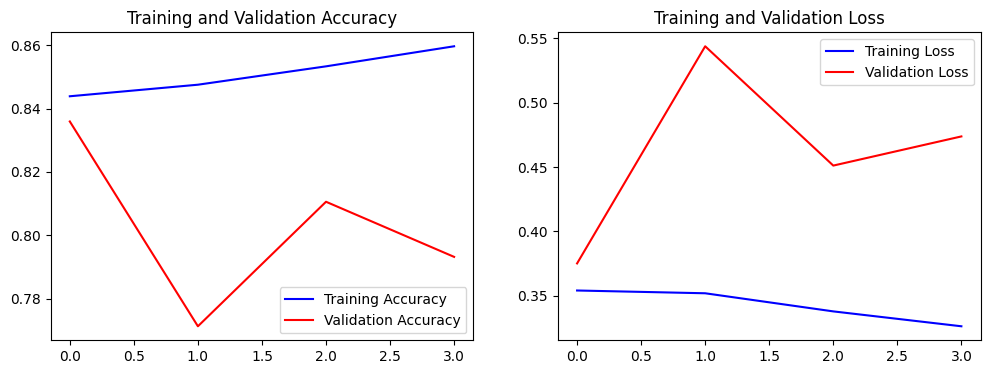

Model saved successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Predicted: 🐱 Cat (0.97 confidence)


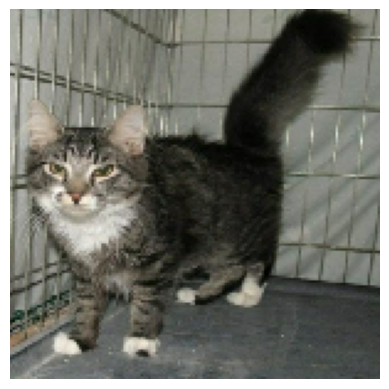

Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted: 🐶 Dog (1.00 confidence)


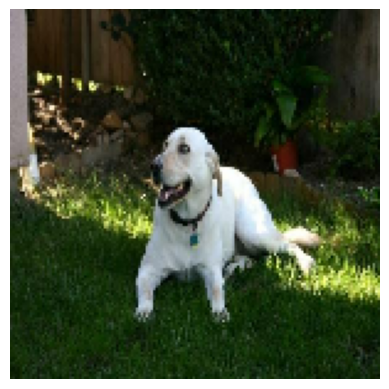

In [9]:
# ✅ Step 1: Visualize Training Results
import matplotlib.pyplot as plt

# Extract accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Plot Training vs Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color='blue')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='red')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot Training vs Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='blue')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='red')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

# ✅ Step 2: Save the Model
model.save("cats_vs_dogs_classifier.h5")
print("Model saved successfully!")

# ✅ Step 3: Load & Test Model with a New Image
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize image
    img_array = image.img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)

    if prediction[0][0] > 0.5:
        print(f"Predicted: 🐶 Dog ({prediction[0][0]:.2f} confidence)")
    else:
        print(f"Predicted: 🐱 Cat ({1 - prediction[0][0]:.2f} confidence)")

    # Show the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# ✅ Step 4: Test the Model with a Sample Image
# Change path accordingly to test a cat or dog image
predict_image('/content/cats_vs_dogs/train/cat/cat_100.jpg')

# ✅ Step 5: Load the Saved Model & Test Again
from tensorflow.keras.models import load_model

loaded_model = load_model("cats_vs_dogs_classifier.h5")
print("Model loaded successfully!")

# Test Again with a Different Image
predict_image('/content/cats_vs_dogs/train/dog/dog_10024.jpg')


In [10]:
from google.colab import files

uploaded = files.upload()  # This will open a file upload dialog


Saving pexels-photo-1108099.jpeg to pexels-photo-1108099.jpeg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted: 🐶 Dog (1.00 confidence)


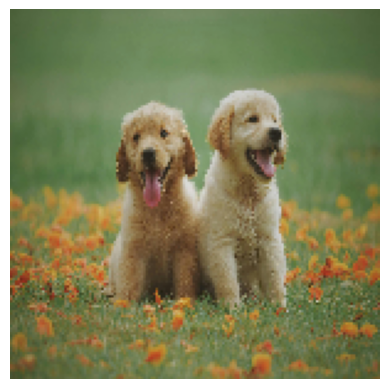

In [12]:
import os

# Get the uploaded file name
image_filename = list(uploaded.keys())[0]
image_path = os.path.join("/content/", image_filename)

# Predict the uploaded image
predict_image(image_path)